In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [4]:
from my_krml_24542250.Data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets()

In [5]:
df_train = pd.DataFrame(X_train, columns=['ds'])
df_train['y'] = y_train

In [6]:
df_val = pd.DataFrame(X_val, columns=['ds'])
df_val['y'] = y_val

In [7]:
import numpy as np
np.float_ = np.float64

In [11]:
from prophet import Prophet

In [12]:
prophet = Prophet()

In [13]:
prophet.fit(df_train)

19:21:27 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
from joblib import dump

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

In [15]:
forecast = prophet.predict(df_val)

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


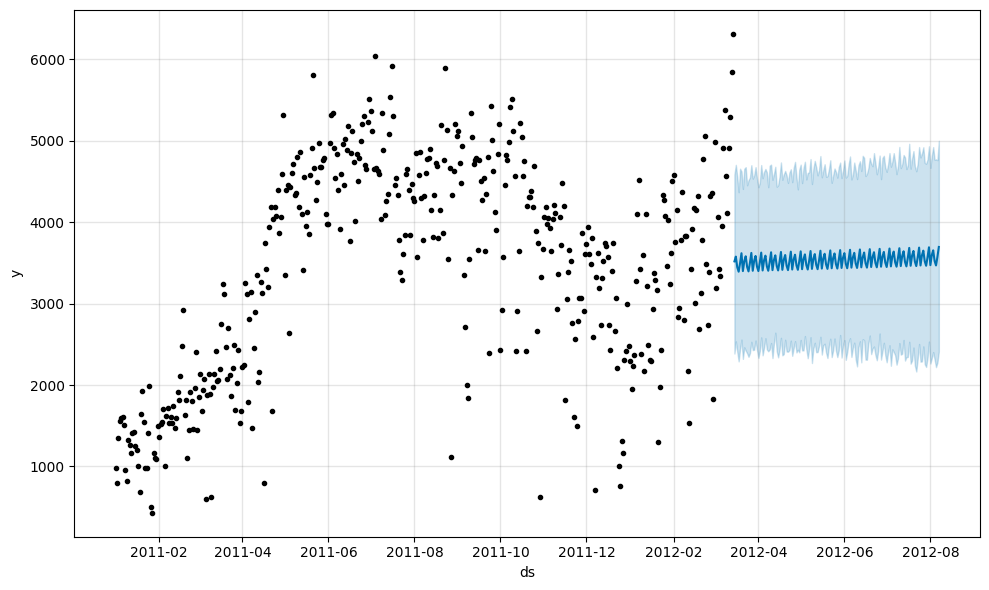

In [16]:
fig1 = prophet.plot(forecast)

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


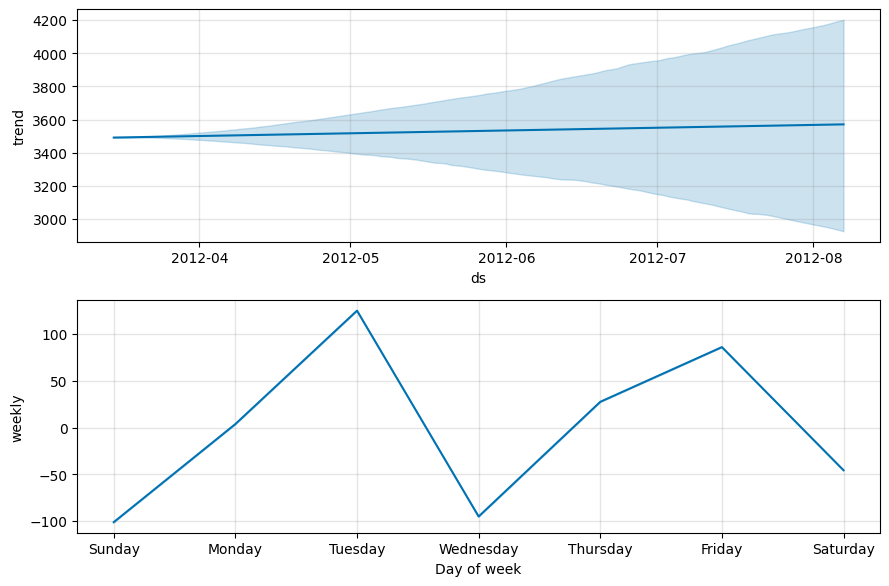

In [17]:
fig2 = prophet.plot_components(forecast)

In [19]:
from my_krml_24542250.models.performance import print_regressor_scores

In [20]:
print_regressor_scores(forecast['yhat'], df_val['y'], set_name='Validation')

RMSE Validation: 3016.3016044420247
MAE Validation: 2855.822784536118


In [21]:
prophet_df = pd.read_csv('../data/interim/day_prophet.csv')

In [22]:
from prophet.diagnostics import cross_validation

In [23]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

  0%|          | 0/10 [00:00<?, ?it/s]

19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1] done processing
19:28:28 - cmdstanpy - INFO - Chain [1] start processing
19:28:28 - cmdstanpy - INFO - Chain [1]

In [24]:
from prophet.diagnostics import performance_metrics
metrics_results = performance_metrics(cv_results)
metrics_results

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.079161e+06,1441.929624,1261.764266,0.287983,0.299426,0.347427,0.4
1,2 days,8.408332e+05,916.969586,805.406578,0.204773,0.208389,0.234072,0.6
2,3 days,1.241272e+06,1114.123942,945.478919,0.321880,0.299783,0.310370,0.4
3,4 days,7.787795e+05,882.484830,714.871776,0.261406,0.183496,0.247671,0.8
4,5 days,1.014885e+06,1007.414956,805.678468,0.214552,0.183004,0.240257,0.7
5,6 days,2.063650e+06,1436.541149,1280.990171,0.290569,0.287378,0.349055,0.5
6,7 days,3.182050e+06,1783.830092,1523.532058,0.360133,0.426003,0.429220,0.4


In [25]:
from prophet.plot import plot_cross_validation_metric

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


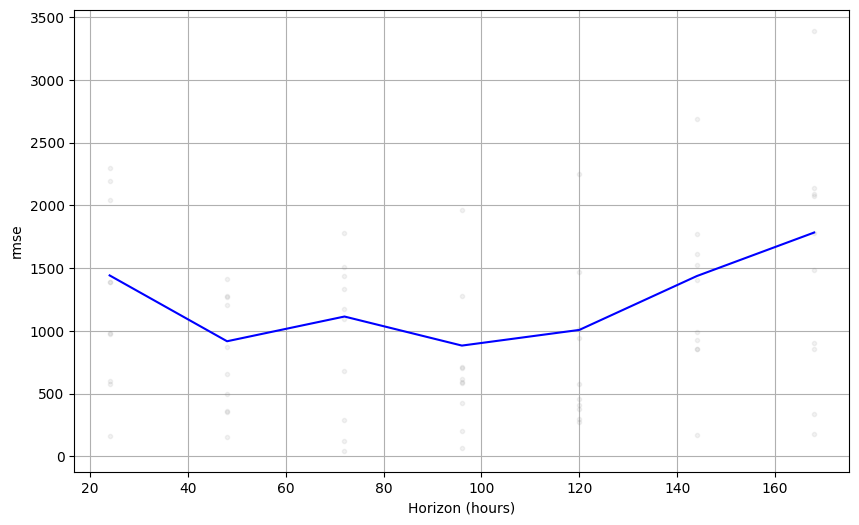

In [26]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

In [27]:
prophet1 = Prophet()

In [28]:
prophet1.add_country_holidays(country_name='US')

In [29]:
prophet1.fit(prophet_df)

19:32:19 - cmdstanpy - INFO - Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

In [31]:
forecast1 = prophet1.predict(df_train)

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:354: Future

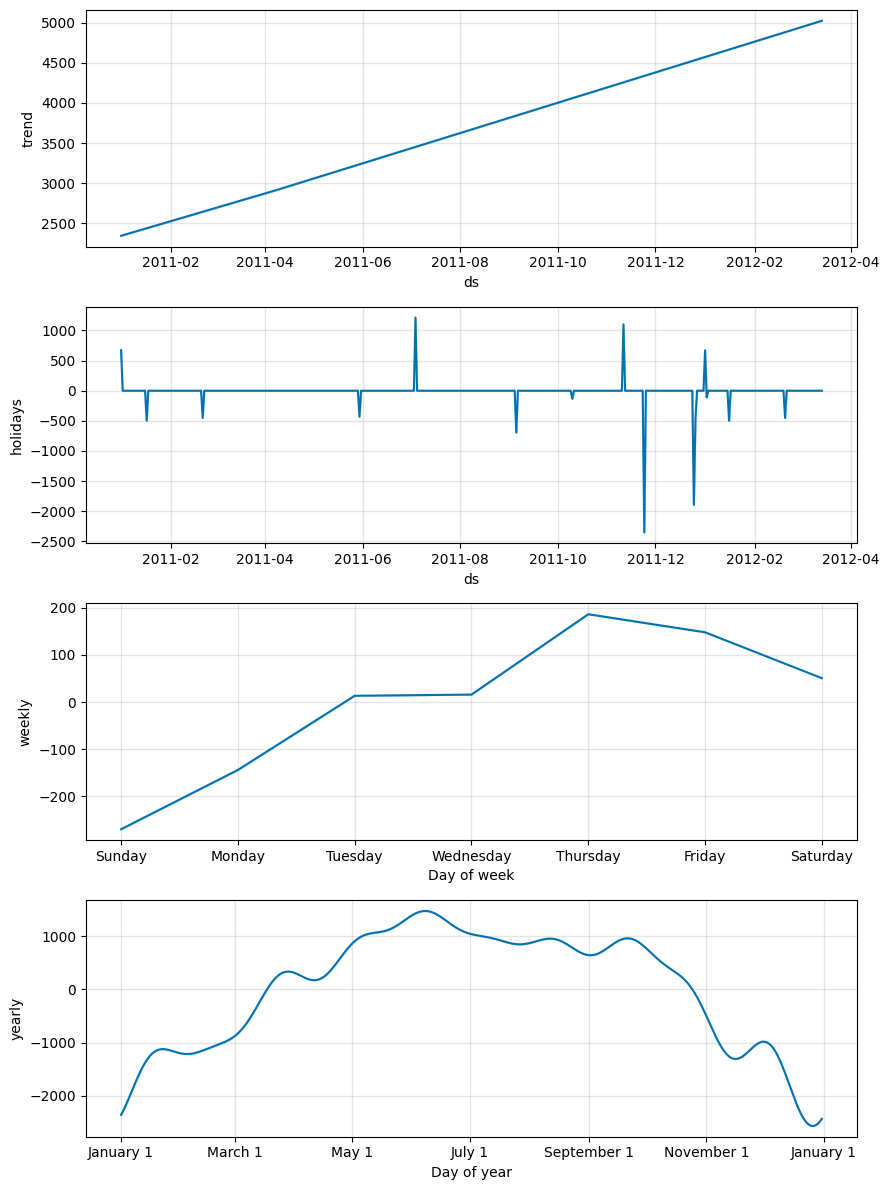

In [32]:
fig1 = prophet1.plot_components(forecast1)

In [33]:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/52 [00:00<?, ?it/s]

19:34:21 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1] done processing
19:34:22 - cmdstanpy - INFO - Chain [1] start processing
19:34:22 - cmdstanpy - INFO - Chain [1]

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


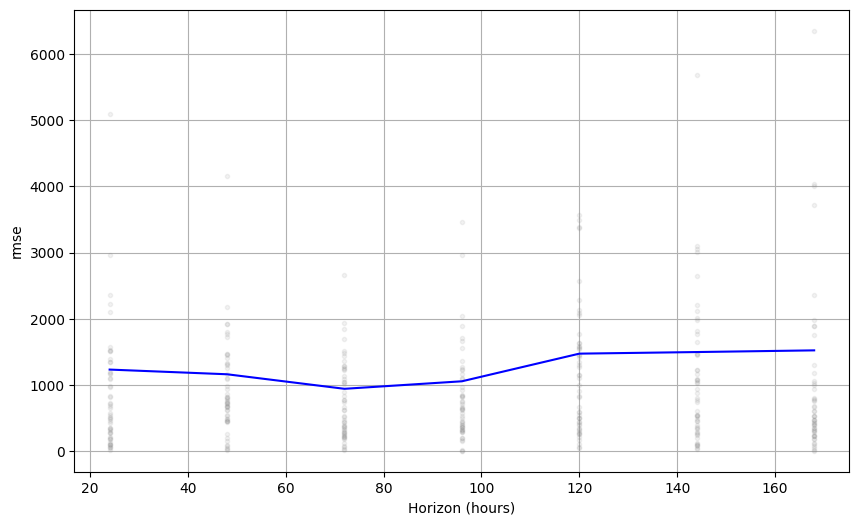

In [34]:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

In [35]:
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

In [36]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [37]:
prophet2.fit(prophet_df)

19:35:32 - cmdstanpy - INFO - Chain [1] start processing
19:35:33 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

In [39]:
forecast2 = prophet2.predict(df_train)

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:354: Future

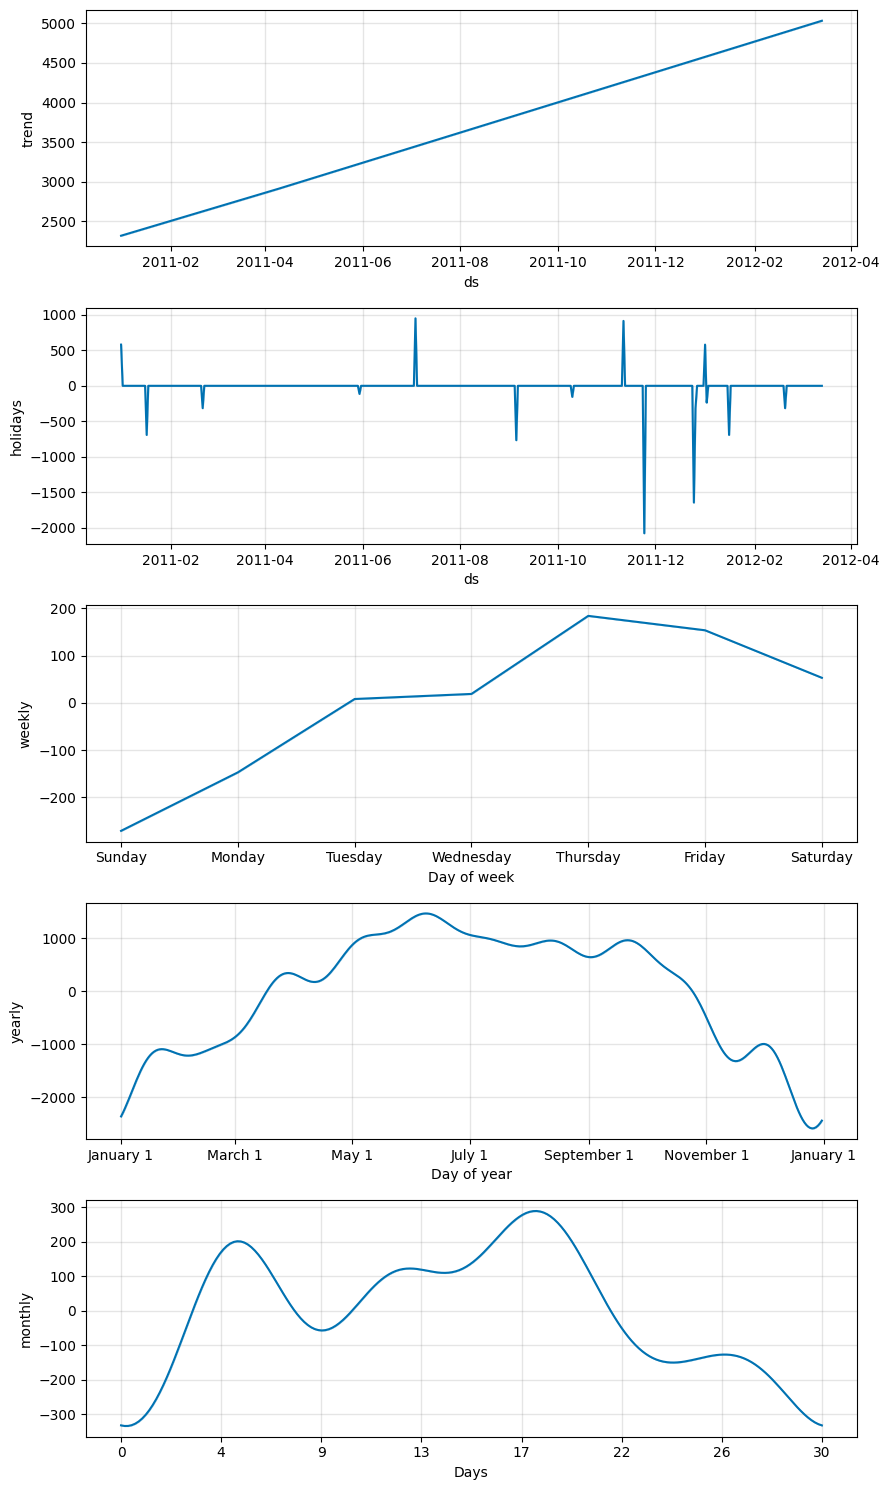

In [40]:
fig1 = prophet2.plot_components(forecast2)

In [41]:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/52 [00:00<?, ?it/s]

19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:53 - cmdstanpy - INFO - Chain [1] start processing
19:36:53 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1] done processing
19:36:54 - cmdstanpy - INFO - Chain [1] start processing
19:36:54 - cmdstanpy - INFO - Chain [1]

/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/thusondube/Library/Caches/pypoetry/virtualenvs/kagglenbadraft-5uiEsQOG-py3.11/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


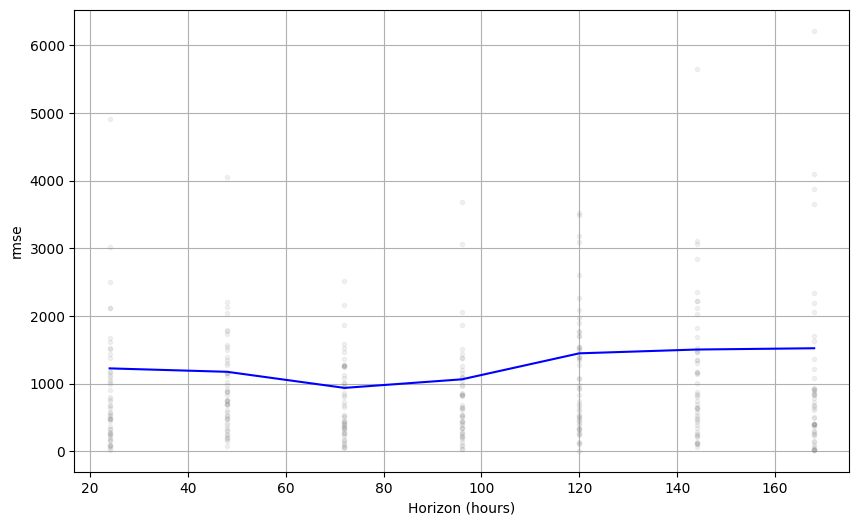

In [42]:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')